# XG325: Explainable Artificial Intelligence
    
## Neural Networks (Classification)

**Week 08 | Lecture 04**

_Saturday, April 26, 2025_

Presented by Dr. Marcin Abram

In [1]:
import numpy
import pandas
import tensorflow
import sklearn.linear_model
import sklearn.metrics
import sklearn.inspection

numpy.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

## Regression

In [2]:
# Load dataset
x1 = numpy.random.random(size=1001)
x2 = 0.5*numpy.random.random(size=1001)
x3 = 0.5*numpy.random.random(size=1001)
xx = pandas.DataFrame.from_dict({'x1': x1, 'x2': x2, 'x3': x3})

y = (x1 + numpy.random.normal(0, 0.2, size=(1001,)) > 0.6).astype('int')

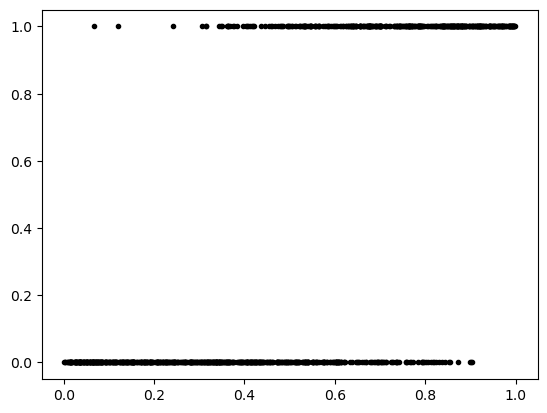

In [3]:
# Plot
plt.plot(x1, y, 'k.'); plt.show()

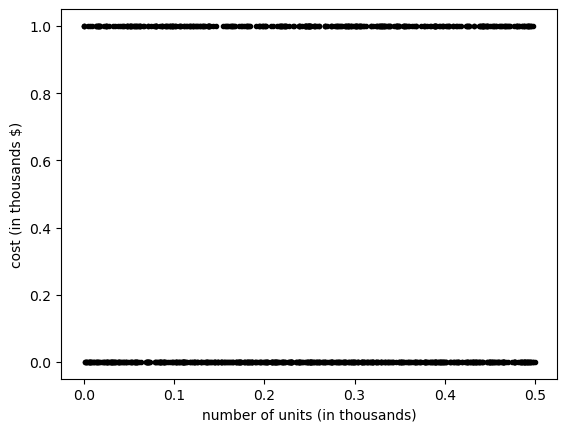

In [4]:
# Plot
plt.plot(x2, y, 'k.')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

## Simple Neural Network

In [5]:
train_x, val_x, train_y, val_y = sklearn.model_selection.train_test_split(xx, y, test_size=0.7)

In [6]:
"""Build model"""
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(3,)),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='Adam',
    loss=tensorflow.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.summary()

/opt/miniconda3/envs/deeplearning-env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-26 11:34:43.752495: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-04-26 11:34:43.752521: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-26 11:34:43.752562: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-26 11:34:43.752620: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-26 11:34:43.752655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
"""Train"""
log = model.fit(train_x, train_y, epochs=100, validation_data=(val_x,  val_y))

Epoch 1/100


2025-04-26 11:34:44.114657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6163 - loss: 0.6872 - val_accuracy: 0.7161 - val_loss: 0.6460
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7499 - loss: 0.6364 - val_accuracy: 0.7832 - val_loss: 0.5990
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7357 - loss: 0.6022 - val_accuracy: 0.8074 - val_loss: 0.5525
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7931 - loss: 0.5506 - val_accuracy: 0.8146 - val_loss: 0.5079
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7641 - loss: 0.5142 - val_accuracy: 0.8245 - val_loss: 0.4696
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7842 - loss: 0.4845 - val_accuracy: 0.8260 - val_loss: 0.4396
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8008 - loss: 0.4712 - val_accuracy: 0.8288 - val_loss: 0.4187
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8151 - loss: 0.4312 - val_accuracy: 0.8345 - val_l

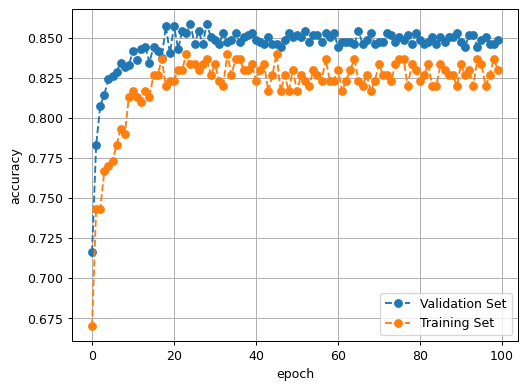

In [8]:
plt.figure(dpi=90)
plt.plot(log.history['val_accuracy'], 'o--', label='Validation Set')
plt.plot(numpy.array(log.history['accuracy']), 'o--', label='Training Set')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()

plt.legend()
plt.show()

In [9]:
"""Evaluate"""
model.evaluate(val_x,  val_y, verbose=2)

22/22 - 0s - 5ms/step - accuracy: 0.8488 - loss: 0.3355


[0.33554786443710327, 0.8487874269485474]

In [10]:
sklearn.metrics.confusion_matrix(val_y, model.predict(val_x) > 0.1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[236, 194],
       [  5, 266]])

In [11]:
sklearn.metrics.accuracy_score(val_y, model.predict(val_x) > 0.5) 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.8487874465049928

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


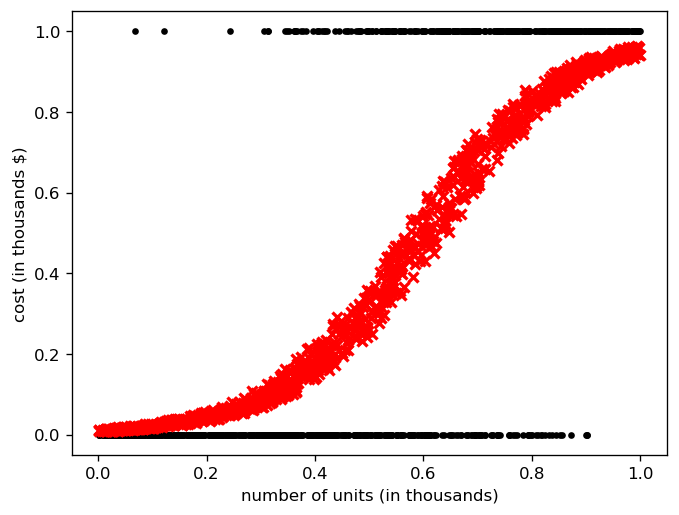

In [12]:
# Plot
plt.figure(dpi=120)
plt.plot(x1, y, 'k.')
plt.plot(x1, model.predict(xx), 'rx', markeredgewidth=2)
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()